# Data Loading and Exploration

In [122]:
import matplotlib.pyplot as plt
import pandas as pd

train  = pd.read_csv("playground-series-s4e12/train.csv")
test = pd.read_csv("playground-series-s4e12/test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [94]:
train.describe().round(2)

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1200000.00,1181295.00,1155051.00,1090328.00,1125924.00,835971.00,1199994.00,1062118.00,1199999.00,1200000.00
mean,599999.50,41.15,32745.22,2.01,25.61,1.00,9.57,592.92,5.02,1102.54
std,346410.31,13.54,32179.51,1.42,12.20,0.98,5.78,149.98,2.59,865.00
min,0.00,18.00,1.00,0.00,2.01,0.00,0.00,300.00,1.00,20.00
25%,299999.75,30.00,8001.00,1.00,15.92,0.00,5.00,468.00,3.00,514.00
50%,599999.50,41.00,23911.00,2.00,24.58,1.00,10.00,595.00,5.00,872.00
75%,899999.25,53.00,44634.00,3.00,34.53,2.00,15.00,721.00,7.00,1509.00
max,1199999.00,64.00,149997.00,4.00,58.98,9.00,19.00,849.00,9.00,4999.00


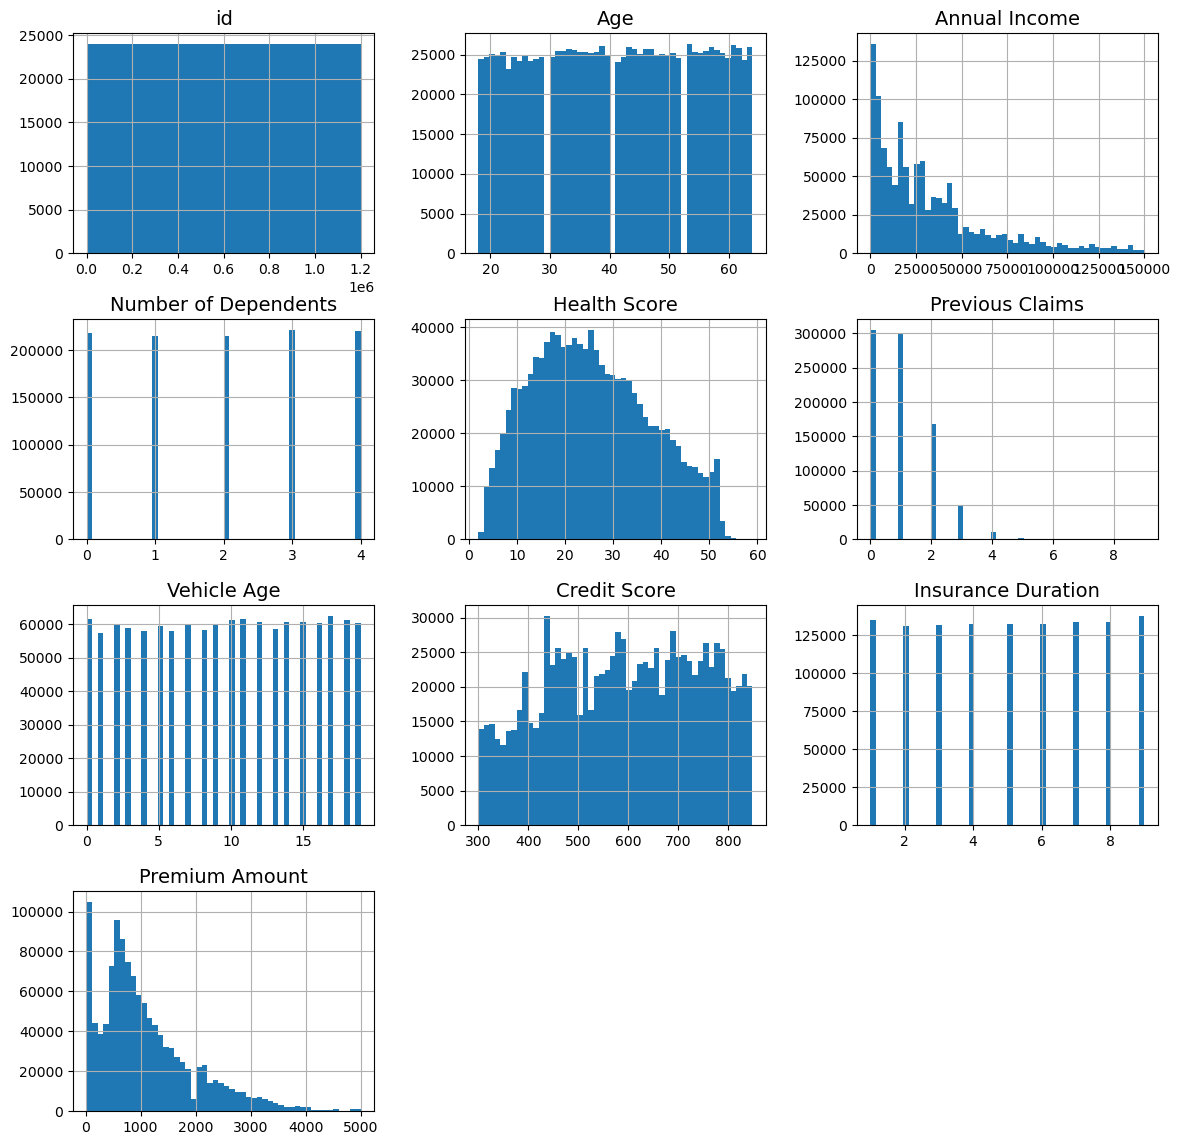

In [95]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train.hist(bins=50, figsize=(14, 14))
plt.savefig("Images/histograms.png") 
plt.show()

In [124]:
float_features = train.select_dtypes(include=['float'])
float_features

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0
2,23.0,25602.0,3.0,47.177549,1.0,14.0,NaN,3.0,567.0
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0
...,...,...,...,...,...,...,...,...,...
1199995,36.0,27316.0,0.0,13.772907,NaN,5.0,372.0,3.0,1303.0
1199996,54.0,35786.0,NaN,11.483482,NaN,10.0,597.0,4.0,821.0
1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,NaN,6.0,371.0
1199998,55.0,NaN,1.0,18.547381,1.0,7.0,407.0,4.0,596.0


KeyboardInterrupt: 

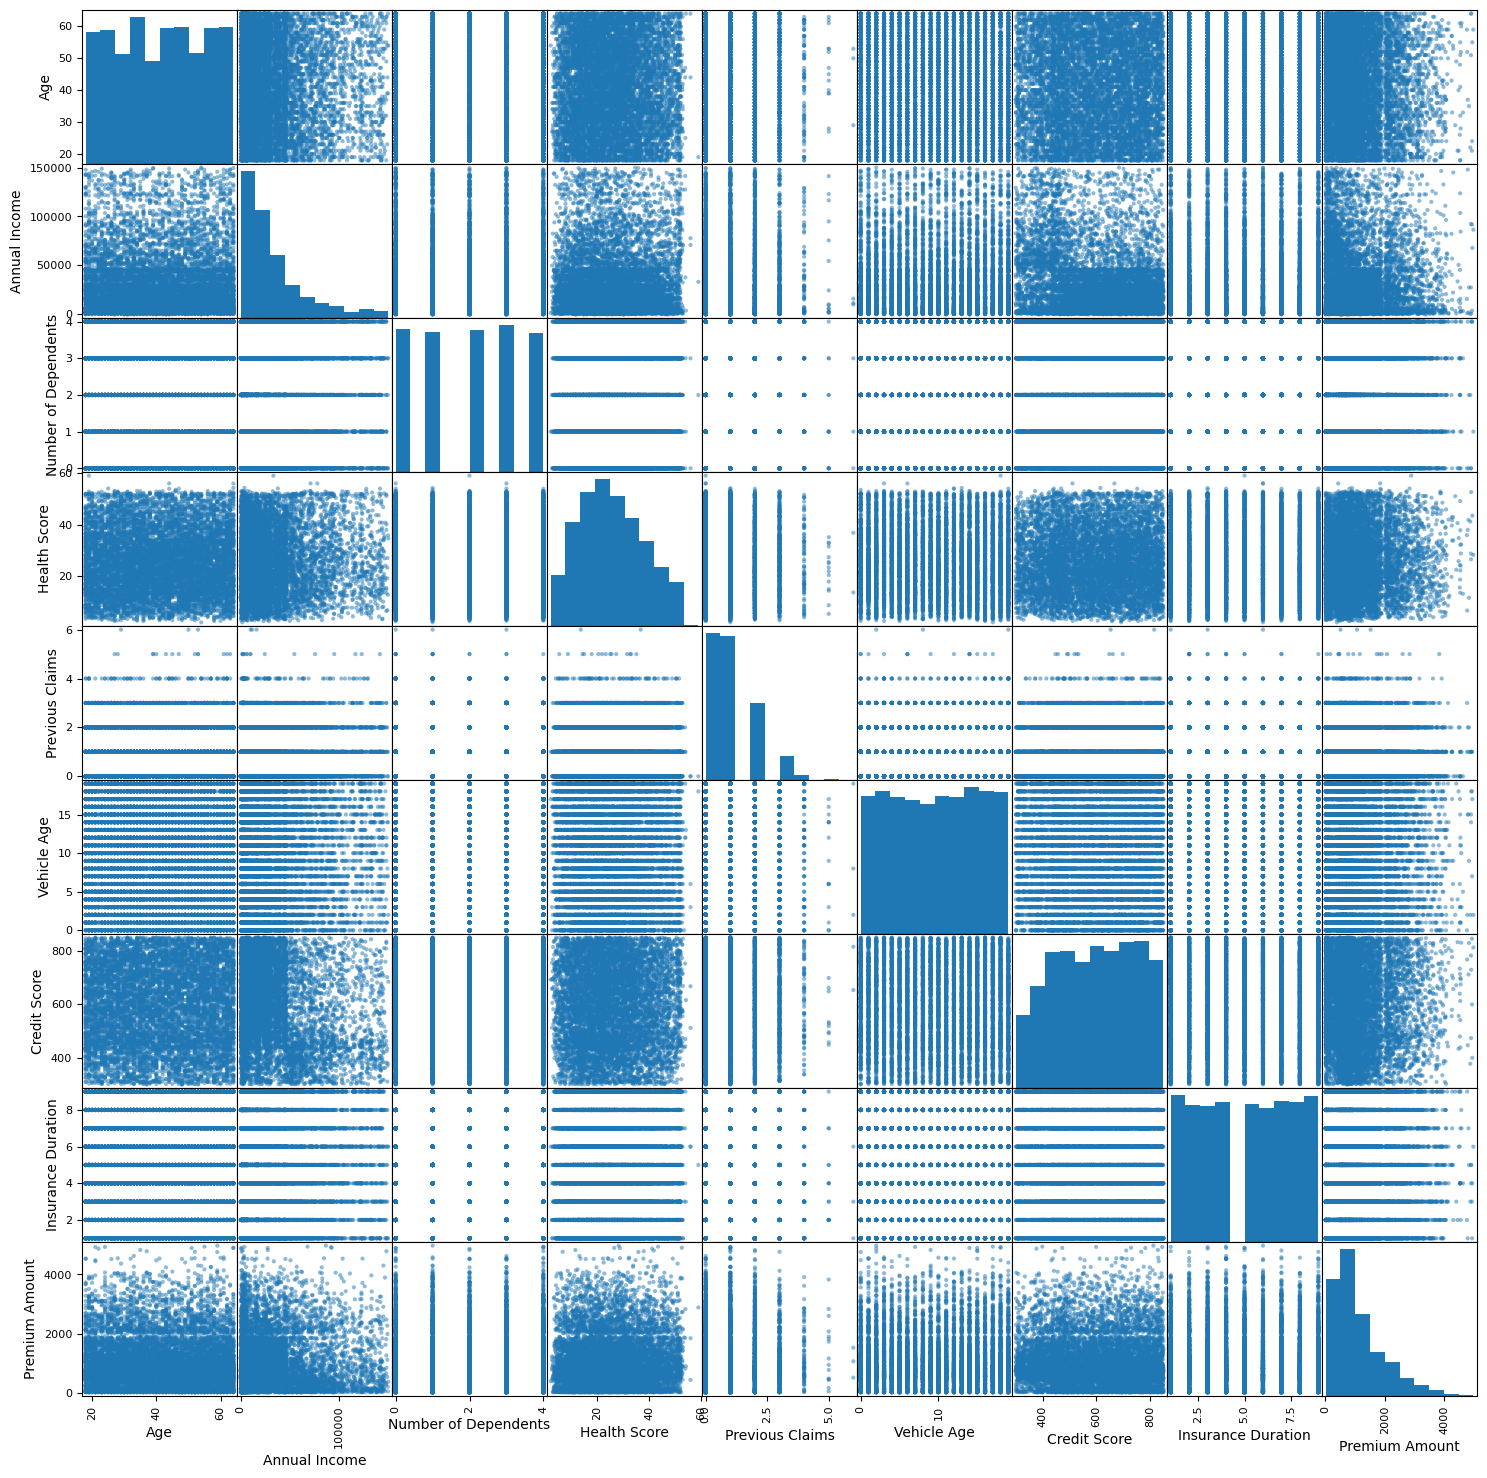

In [125]:
from pandas.plotting import scatter_matrix

scatter_matrix(float_features[:10_000], figsize=(18, 18))
plt.savefig("Images/scatter.png") 
plt.show()

In [126]:
corr = float_features.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
Age,1.000000,-0.000009,0.001475,0.000881,0.001869,-0.002455,0.002842,-0.000064,-0.002430
Annual Income,-0.000009,1.000000,0.002135,0.025530,0.043065,-0.000500,-0.201423,0.000379,-0.012390
Number of Dependents,0.001475,0.002135,1.000000,0.005152,-0.004123,0.001232,-0.001714,-0.000265,-0.000976
Health Score,0.000881,0.025530,0.005152,1.000000,0.001989,0.000316,0.012016,0.002487,0.014704
Previous Claims,0.001869,0.043065,-0.004123,0.001989,1.000000,-0.001172,0.036816,0.003001,0.046874
Vehicle Age,-0.002455,-0.000500,0.001232,0.000316,-0.001172,1.000000,0.000508,0.003132,0.000391
Credit Score,0.002842,-0.201423,-0.001714,0.012016,0.036816,0.000508,1.000000,0.000493,-0.026014
Insurance Duration,-0.000064,0.000379,-0.000265,0.002487,0.003001,0.003132,0.000493,1.000000,-0.000028
Premium Amount,-0.002430,-0.012390,-0.000976,0.014704,0.046874,0.000391,-0.026014,-0.000028,1.000000


In [99]:
corr["Premium Amount"].sort_values(ascending=False)

Premium Amount          1.000000
Previous Claims         0.046874
Health Score            0.014704
Vehicle Age             0.000391
Insurance Duration     -0.000028
Number of Dependents   -0.000976
Age                    -0.002430
Annual Income          -0.012390
Credit Score           -0.026014
Name: Premium Amount, dtype: float64

# Data Preprocessing

In [ ]:
train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [140]:
from sklearn.impute import SimpleImputer

numerical_imputer  = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_columns  = float_features.columns
categorical_columns = list(set(train.columns) - set(numerical_columns) - set(['id', 'Policy Start Date']))

train[numerical_columns]  = numerical_imputer.fit_transform(train[numerical_columns])
train[categorical_columns] = categorical_imputer.fit_transform(train[categorical_columns])

t_float_features = test.select_dtypes(include=['float'])
t_numerical_columns = t_float_features.columns
t_categorical_columns = list(set(test.columns) - set(t_numerical_columns) - set(['id', 'Policy Start Date']))
t_numerical_imputer  = SimpleImputer(strategy='mean')
test[t_numerical_columns]  = t_numerical_imputer.fit_transform(test[t_numerical_columns])
test[categorical_columns] = categorical_imputer.fit_transform(test[categorical_columns])

train.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder      = OneHotEncoder()
encoded_data = encoder.fit_transform(train[categorical_columns])
encoded_df   = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
train.drop(columns=categorical_columns, inplace=True)
train = pd.concat([train, encoded_df], axis=1)
train

KeyError: "None of [Index(['Smoking Status', 'Occupation', 'Marital Status', 'Location', 'Gender',\n       'Exercise Frequency', 'Customer Feedback', 'Policy Type',\n       'Education Level', 'Property Type'],\n      dtype='object')] are in the [columns]"

In [ ]:
t_encoded = encoder.transform(test[categorical_columns])
t_encoded_df = pd.DataFrame(t_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
test.drop(columns=categorical_columns, inplace=True)
test = pd.concat([test, t_encoded_df], axis=1)
test

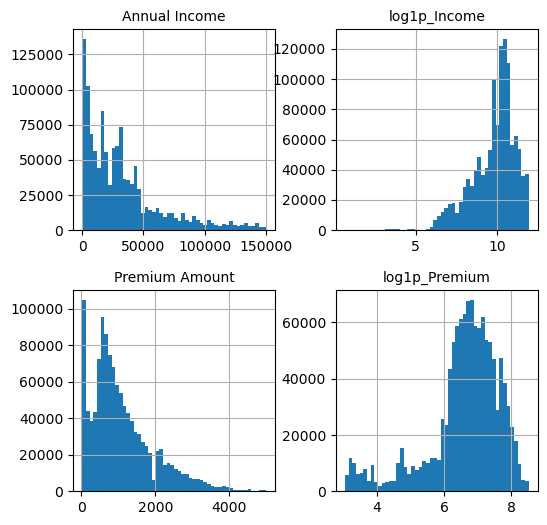

In [147]:
import numpy as np

test['log1p_Income'] = np.log1p(test['Annual Income'])

train['log1p_Income'] = np.log1p(train['Annual Income'])
train['log1p_Premium'] = np.log1p(train['Premium Amount'])
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train[['Annual Income', 'log1p_Income', 'Premium Amount', 'log1p_Premium']].hist(bins=50, figsize=(6, 6))
plt.savefig("Images/log1p_hist.png") 
plt.show()

In [149]:
train = train.drop(columns=['Annual Income', 'Premium Amount'], axis=1)
test  = test.drop(columns=['Annual Income'], axis=1)

t_float_features = list(set(float_features) - set('Annual Income'))
float_features = list(set(float_features) - set(['Annual Income', 'Premium Amount']))

KeyError: "['Annual Income', 'Premium Amount'] not found in axis"

In [105]:
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()
standarded    = stds.fit_transform(train[float_features])
standarded_df = pd.DataFrame(standarded, columns=float_features)

train.drop(columns=float_features, inplace=True)
train = pd.concat([train, standarded_df], axis=1)
train

,id,Policy Start Date,Smoking Status_No,Smoking Status_Yes,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,...,Property Type_House,log1p_Income,log1p_Premium,Insurance Duration,Number of Dependents,Vehicle Age,Credit Score,Age,Health Score,Previous Claims
0,0,2023-12-23 15:21:39.134960,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,9.215328,7.962067,-0.007023,-0.747535,1.286338,-1.565702e+00,-1.648471,-0.255071,1.215746e+00
1,1,2023-06-12 15:21:39.111551,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,10.363409,7.302496,-1.163391,0.732830,0.420713,7.163281e-01,-0.159711,-0.849704,-3.278064e-03
2,2,2023-09-30 15:21:39.221386,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,10.150465,6.342121,-0.777935,0.732830,0.766963,-1.611408e-15,-1.350719,1.824212,-3.278064e-03
3,3,2024-06-12 15:21:39.226954,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,11.862568,6.641182,-1.548847,-0.007353,-1.656787,-1.601137e+00,-1.499595,-1.241521,-3.278064e-03
4,4,2021-12-01 15:21:39.252145,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,10.587897,7.612337,-0.392479,-0.747535,-0.271787,3.597138e-02,-1.499595,-0.443102,-1.222302e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,2023-05-03 15:21:39.257696,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,10.215264,7.173192,-0.777935,-1.487718,-0.791162,-1.565702e+00,-0.383025,-1.001709,-5.413556e-16
1199996,1199996,2022-09-10 15:21:39.134960,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,10.485340,6.711740,-0.392479,0.000000,0.074463,2.888433e-02,0.956858,-1.195387,-5.413556e-16
1199997,1199997,2021-05-25 15:21:39.106582,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,10.856785,5.918894,0.378433,-1.487718,1.632588,-1.611408e-15,-1.648471,-0.921210,-1.222302e+00
1199998,1199998,2021-09-19 15:21:39.190215,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,10.396543,6.391917,-0.392479,-0.747535,-0.444912,-1.317655e+00,1.031296,-0.597805,-3.278064e-03


In [ ]:
from sklearn.preprocessing import StandardScaler

t_stds = StandardScaler()
standarded    = t_stds.fit_transform(test[t_float_features])
standarded_df = pd.DataFrame(standarded, columns=t_float_features)

test.drop(columns=t_float_features, inplace=True)
test = pd.concat([test, standarded_df], axis=1)

,id,Policy Start Date,Smoking Status_No,Smoking Status_Yes,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,...,Property Type_Condo,Property Type_House,log1p_Income,Insurance Duration,Number of Dependents,Vehicle Age,Credit Score,Age,Health Score,Previous Claims
0,1200000,2023-06-04 15:21:39.245086,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,7.745436,-1.549472,1.475653,1.633369,8.047157e-16,-9.780152e-01,-1.518578,0.000000
1,1200001,2024-04-22 15:21:39.224915,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,11.744291,1.149319,-0.006922,0.767146,-1.563642e+00,-7.546636e-01,-1.034512,0.000000
2,1200002,2023-04-05 15:21:39.134960,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,9.746424,1.534861,-1.489496,1.113635,1.600382e+00,4.365453e-01,-0.106440,0.000000
3,1200003,2023-10-25 15:21:39.134960,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,10.323020,-0.007306,0.734365,-1.138545,1.253543e+00,-9.780152e-01,-1.731860,-0.005941
4,1200004,2021-11-26 15:21:39.259788,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,9.293210,0.763778,-0.006922,0.767146,1.147368e+00,-1.275817e+00,-1.164526,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,2021-07-09 15:21:39.184157,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,10.565737,-1.163930,-0.748209,-0.272322,-2.009578e+00,6.598969e-01,-0.940018,0.000000
799996,1999996,2023-03-28 15:21:39.250151,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,11.204537,-1.163930,-1.489496,-1.658278,8.047157e-16,-1.587009e-15,-1.477325,1.213257
799997,1999997,2019-09-30 15:21:39.132191,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,10.468205,0.378236,-1.489496,0.074168,8.047157e-16,-1.126916e+00,-1.604965,0.000000
799998,1999998,2022-05-09 15:21:39.253660,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,10.729022,0.763778,0.734365,1.286880,-8.911984e-01,-5.313119e-01,-0.818346,1.213257


In [155]:
train.drop('Policy Start Date', axis=1, inplace=True)
test.drop('Policy Start Date', axis=1, inplace=True)

# Model Training And Evaluation

In [ ]:
from sklearn.metrics import make_scorer

rmsle_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2)), greater_is_better=False)

x = train.drop('log1p_Premium', axis=1)
y = train['log1p_Premium']

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, x, y, cv=3, scoring=rmsle_scorer)
lin_scores

array([-0.16493586, -0.16511276, -0.16443987])

In [121]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr_scores = cross_val_score(dtr, x, y, cv=3, scoring=rmsle_scorer)
dtr_scores

array([-0.27460344, -0.23185176, -0.28547769])

In [157]:
lin_reg.fit(x, y)
y_pred = lin_reg.predict(test)
y_pred = np.expm1(y_pred).round(3)

In [162]:
ids = np.arange(1_200_000, 1_200_000 + len(test))  # Create an ID column
results_df = pd.DataFrame({'id': ids, 'Premium Amount': y_pred})
results_df.to_csv('predictions.csv', index=False)